In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv('/Users/anshulpattoo/Desktop/CISC 251/Project/Python scripts/Spreadsheets/modifiedwinners.csv', index_col=0)
df

,people_NNS,america_NP,make_VB,president_NN,country_NN,going_VBG,us_PPO,american_JJ,new_JJ,years_NNS,...,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS,winners
0,0.003062,0.003253,0.002679,0.002296,0.003062,0.001339,0.000574,0.004018,0.006506,0.002105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000191,1.0
1,0.011148,0.001423,0.001898,0.002372,0.005218,0.003795,0.000237,0.001660,0.000712,0.004744,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000,1.0
2,0.005772,0.007564,0.002190,0.002588,0.003782,0.001592,0.004976,0.002986,0.004976,0.000995,...,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398,1.0
3,0.000960,0.000960,0.002400,0.004321,0.000480,0.000000,0.000960,0.001920,0.009602,0.000480,...,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000,1.0
4,0.005483,0.000000,0.000000,0.008772,0.000000,0.000000,0.001097,0.005483,0.001097,0.001097,...,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.005326,0.001664,0.001332,0.002663,0.001664,0.000333,0.001664,0.001664,0.001332,0.000999,...,0.001332,0.000000,0.000333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
427,0.007930,0.002390,0.002281,0.004128,0.001303,0.005757,0.001412,0.000978,0.000869,0.001955,...,0.000109,0.000000,0.000000,0.000109,0.000000,0.0,0.000000,0.0,0.000000,0.0
428,0.008583,0.003121,0.004013,0.006019,0.002452,0.006242,0.001338,0.001115,0.000780,0.004570,...,0.000223,0.000000,0.000000,0.000111,0.000111,0.0,0.000000,0.0,0.000000,0.0
429,0.003315,0.003315,0.003803,0.005070,0.000878,0.005265,0.004193,0.000585,0.000390,0.002633,...,0.001072,0.000293,0.000000,0.000098,0.000000,0.0,0.000000,0.0,0.000293,0.0


In [19]:
#Separating out the features
x = df.iloc[:, :817]

#Separating out the target
y = df.iloc[:, 817]

#Standardizing the features
x = StandardScaler().fit_transform(x)


In [20]:
from sklearn.decomposition import PCA

#I want a PCA: two principal components.
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"])
principalDf

,PC1,PC2
0,-0.391934,5.846211
1,-3.757178,-4.052899
2,2.175462,-2.023384
3,9.950769,3.367153
4,12.201382,1.833815
...,...,...
426,6.344577,-1.772194
427,-4.140517,-2.732548
428,-2.684439,-2.922486
429,2.440480,-3.591758


In [21]:
from sklearn.cluster import KMeans
from plotnine import *


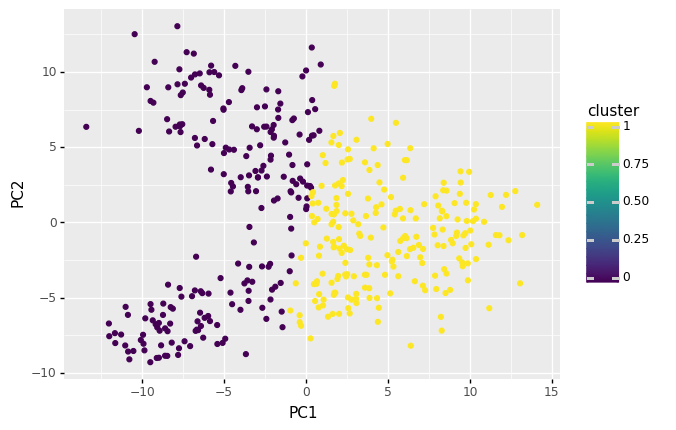

<ggplot: (-9223372036582974120)>

In [22]:
km = KMeans(n_clusters = 2)
km.fit(principalDf)

cluster = km.predict(principalDf)
principalDf["cluster"] = cluster

(ggplot(principalDf, aes("PC1", "PC2", color = "cluster")) + geom_point())